# Análisis Exploratorio de Datos: MM-Food-100K Dataset

**Objetivo:** Realizar un análisis exploratorio completo del dataset multimodal MM-Food-100K para comprender su estructura, composición y potencial para aplicaciones de machine learning.

**Autor:** Data Science Team  
**Fecha:** Noviembre 2025

## 1. Introducción

### 1.1 Descripción del Dataset

**MM-Food-100K** es un dataset multimodal a gran escala diseñado para aplicaciones de visión por computadora y aprendizaje multimodal en el dominio de alimentos. Disponible en Hugging Face (https://huggingface.co/datasets/Codatta/MM-Food-100K), este dataset combina:

- **Imágenes de alimentos:** Fotografías accesibles vía URLs.
- **Anotaciones textuales:** Metadatos descriptivos incluyendo categorías, nombres de platos, ingredientes y métodos de cocción.
- **Información nutricional:** Datos completos sobre calorías, proteínas, grasas y carbohidratos.

### 1.2 Aplicaciones Potenciales

1. **Clasificación de Alimentos:** Modelos de visión por computadora para identificar tipos de comida.
2. **Predicción Nutricional:** Estimación de valores nutricionales a partir de imágenes.
3. **Reconocimiento de Ingredientes:** Detección multi-label de ingredientes.
4. **Sistemas Multimodales:** Búsqueda semántica imagen-texto.
5. **Análisis de Métodos de Cocción:** Clasificación de técnicas culinarias.

## 2. Carga de Datos y Configuración Inicial

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from collections import Counter
from PIL import Image
import io
import json
import requests

# Configuración de visualización
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


In [2]:
# Cargar dataset desde Hugging Face
from datasets import load_dataset

print("Cargando dataset MM-Food-100K desde Hugging Face...")
dataset = load_dataset("Codatta/MM-Food-100K", split="train")

print(f"Dataset cargado exitosamente")
print(f"Número total de ejemplos: {len(dataset)}")
print(f"Columnas disponibles: {dataset.column_names}")

Cargando dataset MM-Food-100K desde Hugging Face...
Dataset cargado exitosamente
Número total de ejemplos: 100000
Columnas disponibles: ['image_url', 'camera_or_phone_prob', 'food_prob', 'dish_name', 'food_type', 'ingredients', 'portion_size', 'nutritional_profile', 'cooking_method', 'sub_dt']


In [3]:
# Convertir a DataFrame
df = dataset.to_pandas()

print(f"DataFrame creado con {len(df)} filas y {len(df.columns)} columnas")
print(f"\nColumnas: {df.columns.tolist()}")

DataFrame creado con 100000 filas y 10 columnas

Columnas: ['image_url', 'camera_or_phone_prob', 'food_prob', 'dish_name', 'food_type', 'ingredients', 'portion_size', 'nutritional_profile', 'cooking_method', 'sub_dt']


## 3. Visión General del Dataset

In [4]:
# Información general
print("Información General del Dataset")
print("=" * 80)
df.info()

Información General del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   image_url             100000 non-null  object 
 1   camera_or_phone_prob  100000 non-null  float64
 2   food_prob             100000 non-null  float64
 3   dish_name             99998 non-null   object 
 4   food_type             100000 non-null  object 
 5   ingredients           100000 non-null  object 
 6   portion_size          100000 non-null  object 
 7   nutritional_profile   100000 non-null  object 
 8   cooking_method        98642 non-null   object 
 9   sub_dt                100000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [5]:
# Primeras filas
print("Primeras 3 filas del dataset:")
print("=" * 80)
df.head(3)

Primeras 3 filas del dataset:


,image_url,camera_or_phone_prob,food_prob,dish_name,food_type,ingredients,portion_size,nutritional_profile,cooking_method,sub_dt
0,https://file.b18a.io/7843322356500104680_44354...,0.70,0.95,Fried Chicken,Restaurant food,"[""chicken"",""breading"",""oil""]","[""chicken:300g""]","{""fat_g"":25.0,""protein_g"":30.0,""calories_kcal""...",Frying,20250704
1,https://file.b18a.io/7833227147700100732_67487...,0.70,1.00,Pho,Restaurant food,"[""noodles"",""beef"",""basil"",""lime"",""green onions...","[""noodles:200g"",""beef:100g"",""vegetables:50g""]","{""fat_g"":15.0,""protein_g"":25.0,""calories_kcal""...",boiled,20250702
2,https://file.b18a.io/7832600581600103585_26423...,0.80,0.95,Pan-fried Dumplings,Restaurant food,"[""dumplings"",""chili oil"",""soy sauce""]","[""dumplings:300g"",""sauce:50g""]","{""fat_g"":15.0,""protein_g"":20.0,""calories_kcal""...",Pan-frying,20250625


Valores Nulos por Columna:
                      Valores Nulos  Porcentaje (%)
cooking_method                 1358            1.36
dish_name                         2            0.00
image_url                         0            0.00
camera_or_phone_prob              0            0.00
food_prob                         0            0.00
food_type                         0            0.00
ingredients                       0            0.00
portion_size                      0            0.00
nutritional_profile               0            0.00
sub_dt                            0            0.00


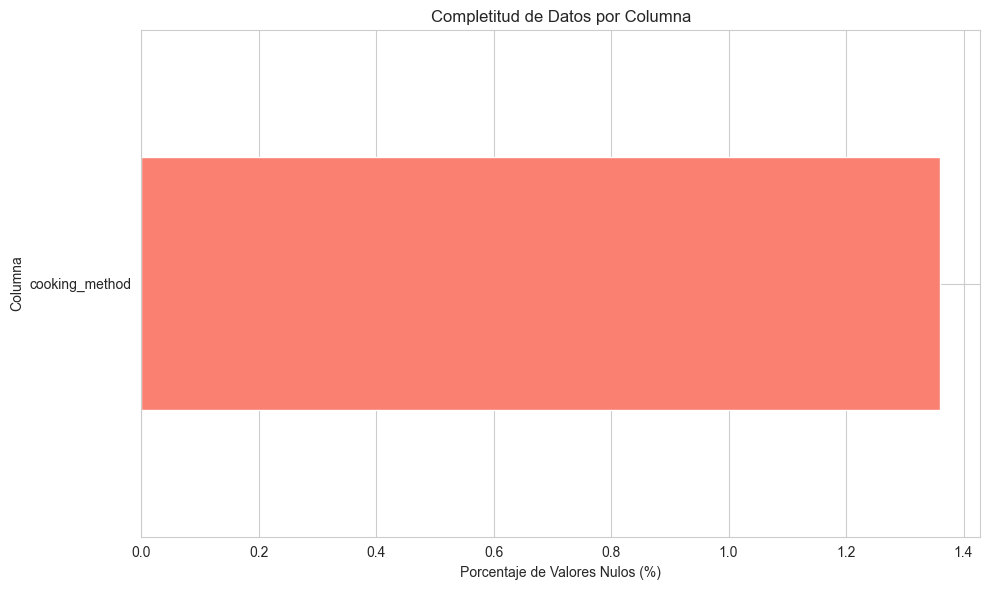

In [6]:
# Análisis de valores nulos
print("Valores Nulos por Columna:")
print("=" * 80)
null_counts = df.isnull().sum()
null_pct = (null_counts / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'Valores Nulos': null_counts,
    'Porcentaje (%)': null_pct
}).sort_values('Valores Nulos', ascending=False)

print(null_summary)

# Visualizar
null_pct_filtered = null_pct[null_pct > 0].sort_values(ascending=True)
if len(null_pct_filtered) > 0:
    plt.figure(figsize=(10, 6))
    null_pct_filtered.plot(kind='barh', color='salmon')
    plt.xlabel('Porcentaje de Valores Nulos (%)')
    plt.ylabel('Columna')
    plt.title('Completitud de Datos por Columna')
    plt.tight_layout()
    plt.show()

## 4. Análisis de Categorías y Etiquetas

In [7]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas categóricas detectadas: {categorical_cols}")
print("\nCardinalidad de variables categóricas:")
for col in categorical_cols:
    print(f"  {col}: {df[col].nunique()} valores únicos")

Columnas categóricas detectadas: ['image_url', 'dish_name', 'food_type', 'ingredients', 'portion_size', 'nutritional_profile', 'cooking_method']

Cardinalidad de variables categóricas:
  image_url: 100000 valores únicos
  dish_name: 19288 valores únicos
  food_type: 5 valores únicos
  ingredients: 53813 valores únicos
  portion_size: 37661 valores únicos
  nutritional_profile: 4544 valores únicos
  cooking_method: 2264 valores únicos


In [8]:
# Identificar columna de etiqueta principal
possible_label_cols = ['category', 'label', 'food_type', 'class', 'type']
label_col = None

for col in possible_label_cols:
    if col in df.columns:
        label_col = col
        break

print(f"Columna de etiqueta principal: {label_col}")

Columna de etiqueta principal: food_type


Número de clases únicas: 5

Distribución completa:
food_type
Homemade food                46555
Restaurant food              35461
Raw vegetables and fruits     9357
Packaged food                 8354
Others                         273
Name: count, dtype: int64


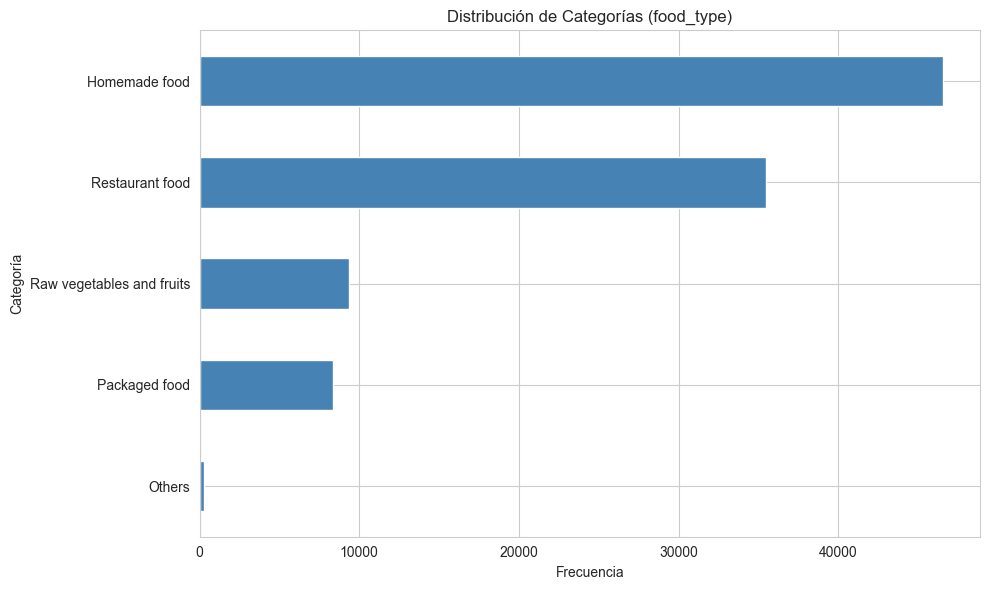

In [9]:
# Distribución de clases principales
if label_col:
    class_distribution = df[label_col].value_counts()
    
    print(f"Número de clases únicas: {len(class_distribution)}")
    print(f"\nDistribución completa:")
    print(class_distribution)
    
    # Visualización
    plt.figure(figsize=(10, 6))
    class_distribution.plot(kind='barh', color='steelblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('Categoría')
    plt.title(f'Distribución de Categorías ({label_col})')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [10]:
# Análisis de desbalance de clases
if label_col and 'class_distribution' in locals():
    class_pct = (class_distribution / len(df) * 100).round(2)
    
    print("Análisis de Desbalance de Clases:")
    print(f"  Clase más frecuente: {class_distribution.index[0]} ({class_pct.iloc[0]:.2f}%)")
    print(f"  Clase menos frecuente: {class_distribution.index[-1]} ({class_pct.iloc[-1]:.2f}%)")
    print(f"  Ratio max/min: {class_distribution.iloc[0] / class_distribution.iloc[-1]:.2f}x")

Análisis de Desbalance de Clases:
  Clase más frecuente: Homemade food (46.56%)
  Clase menos frecuente: Others (0.27%)
  Ratio max/min: 170.53x


## 5. Análisis de Texto y Metadatos

Top 20 Platos Más Frecuentes:
dish_name
Noodle Soup                           1960
Dumplings                             1236
Hot Pot                                995
Stir-fried Noodles                     796
Fried Chicken                          712
Apple                                  705
Watermelon                             695
Fried Rice                             612
Pizza                                  609
Beef Noodle Soup                       582
Lychee                                 566
Mixed Asian Cuisine                    530
Grilled Meat Skewers                   520
Seafood Platter                        420
Strawberries                           400
Braised Pork Belly                     399
Stir-fried Chicken with Vegetables     399
Beef Stir-Fry                          388
Braised Pork                           384
Vegetable Stir-Fry                     360
Name: count, dtype: int64


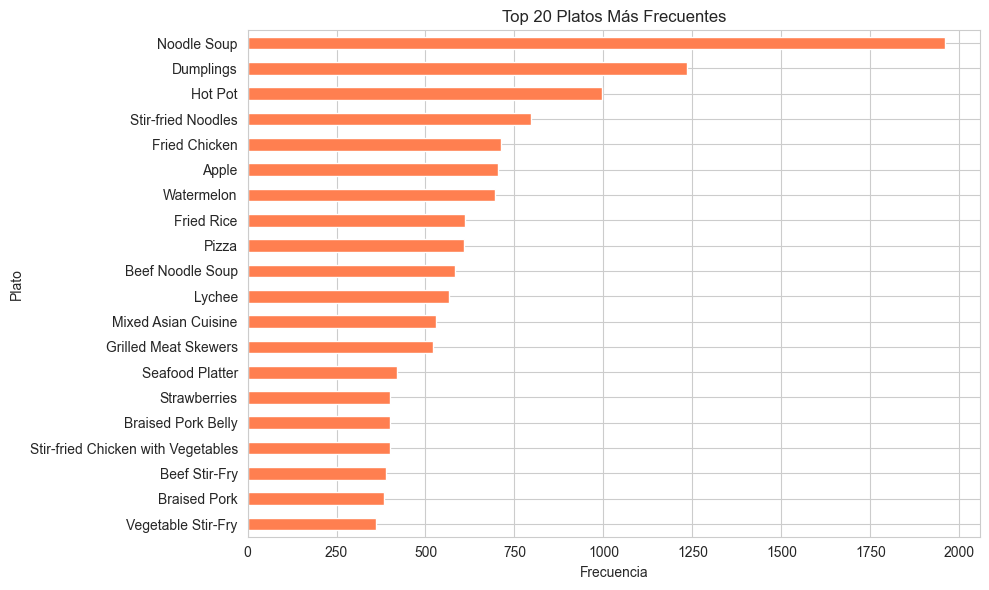

In [11]:
# Análisis de platos más comunes
if 'dish_name' in df.columns:
    dish_distribution = df['dish_name'].value_counts()
    
    print("Top 20 Platos Más Frecuentes:")
    print(dish_distribution.head(20))
    
    plt.figure(figsize=(10, 6))
    dish_distribution.head(20).plot(kind='barh', color='coral')
    plt.xlabel('Frecuencia')
    plt.ylabel('Plato')
    plt.title('Top 20 Platos Más Frecuentes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

Top 15 Métodos de Cocción:
cooking_method
Raw                      11598
boiling                   7162
Fried                     6286
Stir-frying               5887
stir-frying               5325
Baked                     4186
boiled                    4010
Grilling                  3663
Baking                    3045
stir-fried                2689
stewing                   1807
braising                  1695
boiled and stir-fried     1599
steamed                   1541
Frying                    1472
Name: count, dtype: int64


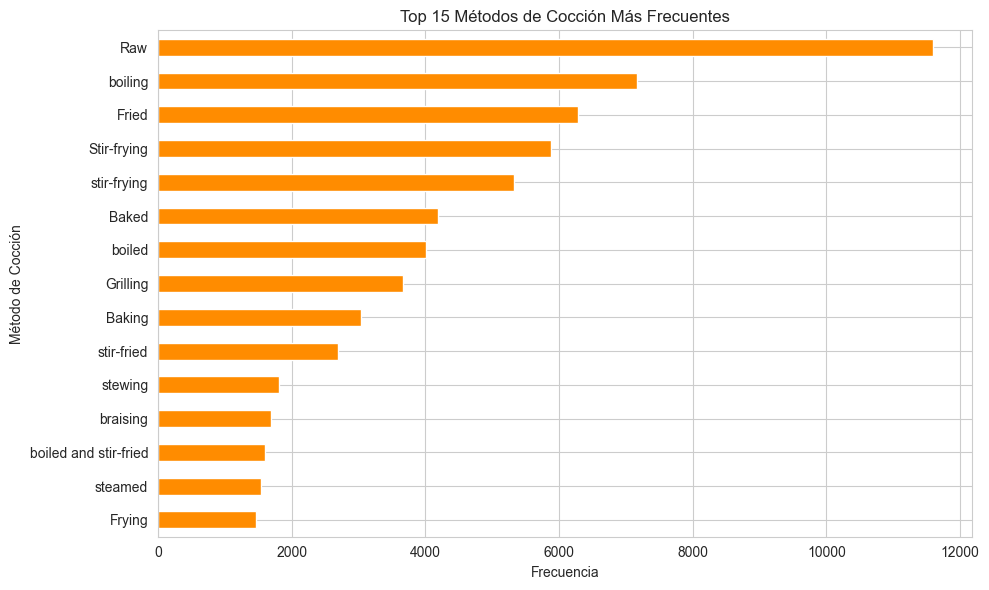

In [12]:
# Análisis de métodos de cocción
if 'cooking_method' in df.columns:
    cooking_methods = df['cooking_method'].value_counts()
    
    print("Top 15 Métodos de Cocción:")
    print(cooking_methods.head(15))
    
    plt.figure(figsize=(10, 6))
    cooking_methods.head(15).plot(kind='barh', color='darkorange')
    plt.xlabel('Frecuencia')
    plt.ylabel('Método de Cocción')
    plt.title('Top 15 Métodos de Cocción Más Frecuentes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 6. Análisis de Ingredientes

Parseando ingredientes...
Total de ingredientes únicos (en muestra): 1061

Top 20 Ingredientes:
 ingrediente  frecuencia
  vegetables         767
      spices         644
       sauce         603
green onions         595
     noodles         582
     chicken         518
        meat         499
        rice         480
       sugar         384
        beef         381
   soy sauce         365
      garlic         314
       broth         309
         egg         300
       flour         289
      shrimp         278
         oil         273
        pork         252
        eggs         210
     carrots         207


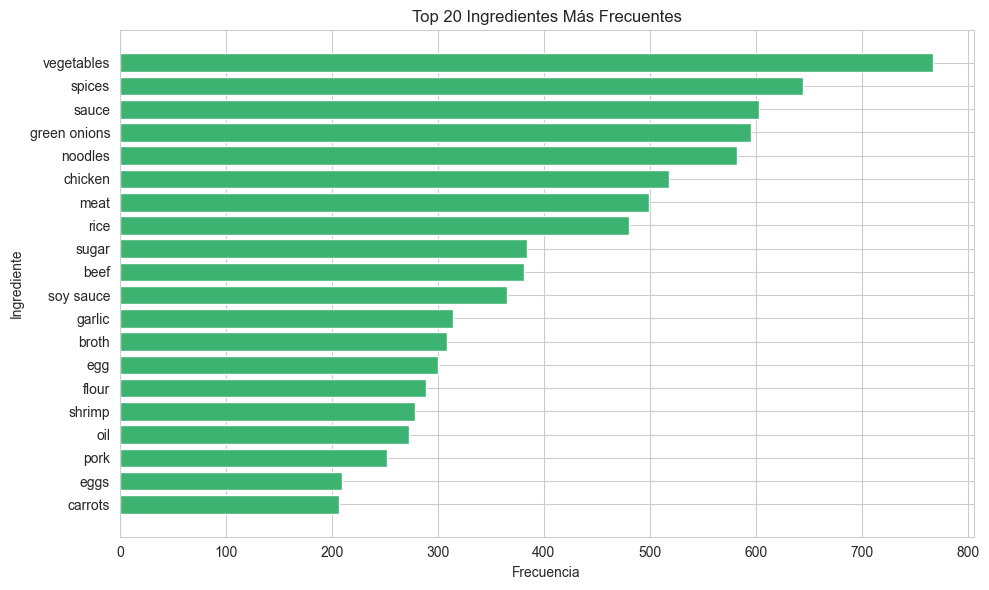

In [13]:
# Análisis de ingredientes
if 'ingredients' in df.columns:
    all_ingredients = []
    
    print("Parseando ingredientes...")
    for idx, row in df.head(5000).iterrows():
        try:
            ingredients = json.loads(row['ingredients'])
            if isinstance(ingredients, list):
                all_ingredients.extend(ingredients)
        except:
            pass
    
    ingredient_counter = Counter(all_ingredients)
    top_ingredients = pd.DataFrame(ingredient_counter.most_common(20), 
                                    columns=['ingrediente', 'frecuencia'])
    
    print(f"Total de ingredientes únicos (en muestra): {len(ingredient_counter)}")
    print("\nTop 20 Ingredientes:")
    print(top_ingredients.to_string(index=False))
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_ingredients['ingrediente'], top_ingredients['frecuencia'], color='mediumseagreen')
    plt.xlabel('Frecuencia')
    plt.ylabel('Ingrediente')
    plt.title('Top 20 Ingredientes Más Frecuentes')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## 7. Análisis de Información Nutricional

In [14]:
# Parsear información nutricional
nutrition_data = []

print("Parseando datos nutricionales...")
for idx, row in df.head(1000).iterrows():
    try:
        nutrition = json.loads(row['nutritional_profile'])
        nutrition['index'] = idx
        nutrition_data.append(nutrition)
    except:
        pass

df_nutrition = pd.DataFrame(nutrition_data)

print(f"Columnas nutricionales: {df_nutrition.columns.tolist()}")
print(f"Total de registros: {len(df_nutrition)}")
print("\nEstadísticas:")
print(df_nutrition.describe())

Parseando datos nutricionales...
Columnas nutricionales: ['fat_g', 'protein_g', 'calories_kcal', 'carbohydrate_g', 'index']
Total de registros: 1000

Estadísticas:
        fat_g  protein_g  calories_kcal  carbohydrate_g   index
count 1000.00    1000.00        1000.00         1000.00 1000.00
mean    17.71      21.64         414.73           41.00  499.50
std     14.50      17.41         253.81           28.53  288.82
min      0.00       0.00           2.00            0.00    0.00
25%     10.00       6.00         250.00           20.00  249.75
50%     15.00      20.00         350.00           36.00  499.50
75%     25.00      30.00         600.00           60.00  749.25
max    150.00     120.00        2500.00          270.00  999.00


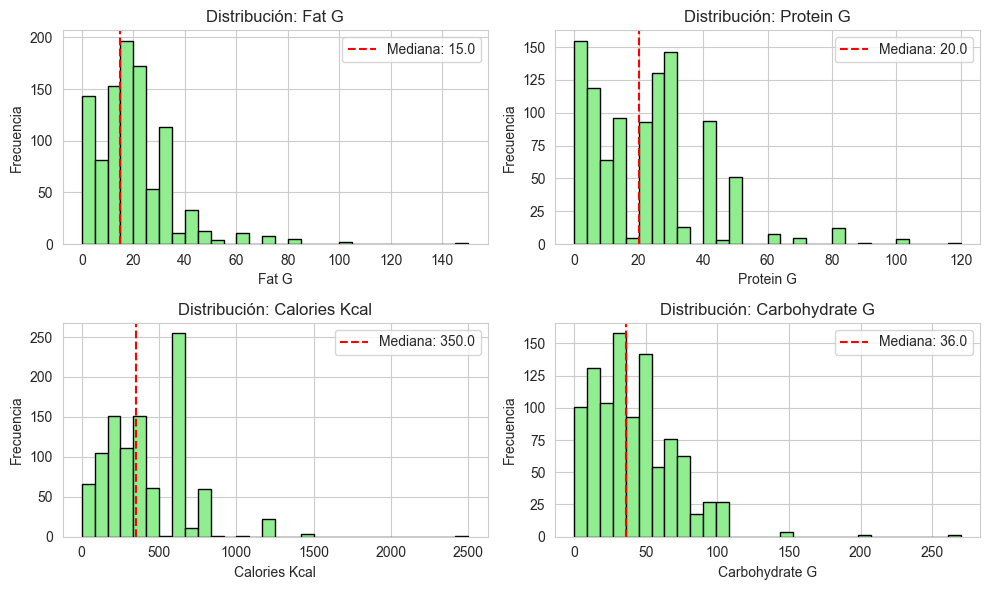

In [15]:
# Visualizar distribuciones nutricionales
if len(df_nutrition) > 0:
    numeric_nutrition_cols = df_nutrition.select_dtypes(include=[np.number]).columns.tolist()
    if 'index' in numeric_nutrition_cols:
        numeric_nutrition_cols.remove('index')
    
    if len(numeric_nutrition_cols) > 0:
        num_plots = min(4, len(numeric_nutrition_cols))
        fig, axes = plt.subplots(2, 2, figsize=(10, 6))
        axes = axes.ravel()
        
        for idx, col in enumerate(numeric_nutrition_cols[:num_plots]):
            df_nutrition[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='lightgreen')
            axes[idx].set_xlabel(col.replace('_', ' ').title())
            axes[idx].set_ylabel('Frecuencia')
            axes[idx].set_title(f'Distribución: {col.replace("_", " ").title()}')
            axes[idx].axvline(df_nutrition[col].median(), color='red', linestyle='--',
                              label=f'Mediana: {df_nutrition[col].median():.1f}')
            axes[idx].legend()
        
        for idx in range(num_plots, 4):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()

## 8. Análisis de Imágenes (URLs)

Análisis de URLs de Imágenes
Total de registros: 100000
URLs válidas: 100000 (100.00%)
URLs faltantes: 0 (0.00%)

Dominios de hosting:
image_url
file.b18a.io    100000
Name: count, dtype: int64


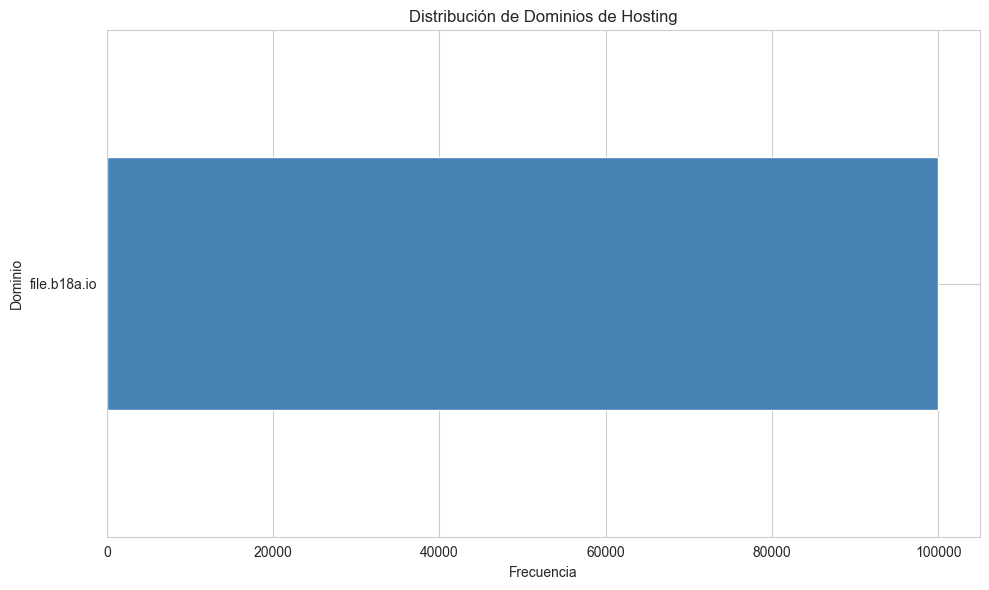

In [16]:
# Análisis de URLs
print("Análisis de URLs de Imágenes")
print("=" * 80)

urls_validas = df['image_url'].notna().sum()
urls_vacias = df['image_url'].isna().sum()

print(f"Total de registros: {len(df)}")
print(f"URLs válidas: {urls_validas} ({urls_validas/len(df)*100:.2f}%)")
print(f"URLs faltantes: {urls_vacias} ({urls_vacias/len(df)*100:.2f}%)")

# Extraer dominios
url_domains = df['image_url'].str.extract(r'https?://([^/]+)', expand=False)
domain_counts = url_domains.value_counts()

print(f"\nDominios de hosting:")
print(domain_counts.head(10))

plt.figure(figsize=(10, 6))
domain_counts.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Frecuencia')
plt.ylabel('Dominio')
plt.title('Distribución de Dominios de Hosting')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [17]:
# Mostrar ejemplos de URLs con metadatos
print("Ejemplos de URLs con Metadatos:")
print("=" * 80)

num_samples = 5
sample_indices = np.random.choice(len(df), num_samples, replace=False)

for idx in sample_indices:
    print(f"\nMuestra {idx}:")
    print(f"  URL: {df.iloc[idx]['image_url']}")
    if label_col:
        print(f"  Categoría: {df.iloc[idx][label_col]}")
    if 'dish_name' in df.columns:
        print(f"  Plato: {df.iloc[idx]['dish_name']}")
    print("  " + "-" * 70)

Ejemplos de URLs con Metadatos:

Muestra 58795:
  URL: https://file.b18a.io/7832758164900102998_311269_.jpg
  Categoría: Homemade food
  Plato: Dumplings
  ----------------------------------------------------------------------

Muestra 76898:
  URL: https://file.b18a.io/7834401275200104735_494886_.jpg
  Categoría: Raw vegetables and fruits
  Plato: Grapefruit slices
  ----------------------------------------------------------------------

Muestra 73230:
  URL: https://file.b18a.io/7858860103300101761_794708_.jpg
  Categoría: Restaurant food
  Plato: Grilled Chicken Wings
  ----------------------------------------------------------------------

Muestra 98816:
  URL: https://file.b18a.io/7867903688500101108_248479_.jpeg
  Categoría: Homemade food
  Plato: Dragon Fruit
  ----------------------------------------------------------------------

Muestra 41786:
  URL: https://file.b18a.io/7839928545300109047_161240_.jpg
  Categoría: Restaurant food
  Plato: Spicy Crawfish
  -------------------

## 9. Calidad de Datos

In [18]:
# Resumen de completitud
print("Resumen de Calidad de Datos:")
print("=" * 80)

total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
completeness = (1 - total_missing / total_cells) * 100

print(f"Completitud general: {completeness:.2f}%")
print(f"Total de celdas: {total_cells:,}")
print(f"Valores faltantes: {total_missing:,}")

Resumen de Calidad de Datos:
Completitud general: 99.86%
Total de celdas: 1,000,000
Valores faltantes: 1,360


In [19]:
# Detección de duplicados
num_duplicates = df.duplicated().sum()

print(f"Filas duplicadas: {num_duplicates}")
print(f"Porcentaje: {num_duplicates / len(df) * 100:.2f}%")

Filas duplicadas: 0
Porcentaje: 0.00%


In [20]:
# Consistencia de etiquetas
if label_col:
    missing_labels = df[label_col].isnull().sum()
    empty_labels = (df[label_col].astype(str).str.strip() == '').sum()
    
    print("Consistencia de Etiquetas:")
    print(f"  Sin etiqueta: {missing_labels}")
    print(f"  Etiqueta vacía: {empty_labels}")
    print(f"  Etiquetas válidas: {len(df) - missing_labels - empty_labels}")

Consistencia de Etiquetas:
  Sin etiqueta: 0
  Etiqueta vacía: 0
  Etiquetas válidas: 100000


## 10. Conclusiones y Próximos Pasos

### Características Principales

- **100,000 registros** con imágenes accesibles vía URLs
- **5 categorías principales** de alimentos (food_type)
- **~19,000 platos únicos** con distribución long-tail
- **Información nutricional completa** en formato JSON
- **Ingredientes y métodos de cocción** estructurados

### Tareas Recomendadas

1. **Clasificación de food_type:** 5 clases balanceadas
2. **Predicción nutricional:** Estimación de calorías y macronutrientes
3. **Reconocimiento de ingredientes:** Multi-label classification
4. **Clasificación fine-grained:** 19K platos específicos
5. **Sistemas multimodales:** Búsqueda imagen-texto

### Desafíos

- Imágenes externas requieren descarga previa
- Distribución long-tail en platos específicos
- Datos en JSON requieren parsing
- Variabilidad en cooking_method

### Próximos Pasos

1. Descargar y almacenar imágenes localmente
2. Parsear y limpiar datos JSON
3. Crear baseline de clasificación
4. Implementar modelo de predicción nutricional
5. Desarrollar sistema multimodal